In [ ]:
#importing the requisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the csv file into the data frame

#Reading the dataframe without the header so that the first observation is not lost in case the dataset is missing the Header
#and not loose the first observation in case the header is missing

df= pd.read_csv("haberman.csv", header= None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
#getting the dimensions of the data
print(df.shape)
r= len(df.axes[0])
c= len(df.axes[1])
print("The number of columns in the data set are: {} ".format(c))
print("The number of rows in the data set are: {} ".format(r))

(306, 4)
The number of columns in the data set are: 4 
The number of rows in the data set are: 306 


In [ ]:
#get the names of the coulumns
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [ ]:
#look at the first 5 rows of the dataset
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
df

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


Observation

It is evnident that the data set doenst have the column labels hence the first observation has been taken as the column names.
As per the above the data set has a total of 305 rows and 4 columns but since the first observation has been taken as a the
tile of the columnns, the dataset actually has 306 rows and 4 columns

Next Steps
Find out what are the column names and what they actually represent and give column labels accordingly.

Next Steps: Step 1

I was able to find out from the description of the dataset that the attribute information is as below:

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year

In [ ]:
#Giving each of the attributes its appropriate Title
attr_labels=["age","Year of Operation","# Positive axillary nodes detected",'survival status']

In [ ]:
df.columns=attr_labels 
df.head()

,age,Year of Operation,# Positive axillary nodes detected,survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
#check for Null values in a DataFrame
df.isnull().sum()

age                                   0
Year of Operation                     0
# Positive axillary nodes detected    0
survival status                       0
dtype: int64

It is evident from above that there are no missing values in the dataframe

In [ ]:
#Getting the DateTypes of all the attributes in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   age                                 306 non-null    int64
 1   Year of Operation                   306 non-null    int64
 2   # Positive axillary nodes detected  306 non-null    int64
 3   survival status                     306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Observation: All the 4 columns appear to be of the int Data Type and the datatype of each of the attributes matches with the 
description of the dataset

Since the Year of Operation attribute is in the 20th century but the Year of operation attribute only has the last 2 digits of
the attribute hence adding 1900 to each of the row items to display the year as 19XX

In [ ]:
df['Year of Operation']= df['Year of Operation']+1900
df.head()

,age,Year of Operation,# Positive axillary nodes detected,survival status
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


In [ ]:
#Check the distribution of Survival Status of the pateients between the two classes
count_1= 0
count_2= 0
for i in df['survival status']:
    if i == 1:
        count_1= count_1+1
    else:
        count_2= count_2+1
        
print("The Number of patients who survived 5 years or longer are: {}".format(count_1))
print("The Number of patients who died wihtin 5 years are: {}".format(count_2))
print("The percentage of the patients who survived 5 years or longer are",count_1/(count_1+count_2))
print("The percentage of the patients who died wihtin 5 years are",count_2/(count_1+count_2))

The Number of patients who survived 5 years or longer are: 225
The Number of patients who died wihtin 5 years are: 81
The percentage of the patients who survived 5 years or longer are 0.7352941176470589
The percentage of the patients who died wihtin 5 years are 0.2647058823529412


Observations: From the above analysis it is evident that 73.5% of the patients have survived the treatment while 26.4% of the
patients have died wihtin 5 years.

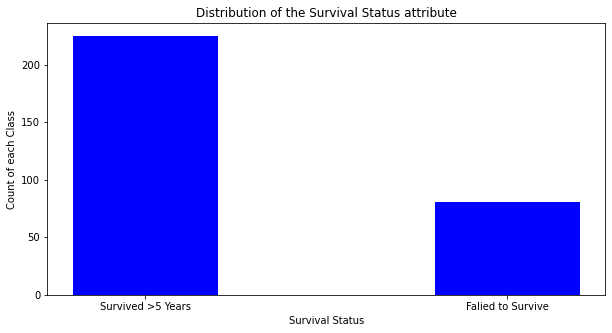

In [ ]:
#Plot a bar chart to look at the distribution of the survival status

#Setting up the dimensions of the background plane or the layout with width 10 and height 5
fig= plt.figure(figsize=(10,5))

#Plotting the bar chart
status= ["Survived >5 Years","Falied to Survive"]
counts= [count_1, count_2]

plt.bar(status,counts, color="blue", width=0.4)

plt.xlabel("Survival Status")
plt.ylabel("Count of each Class")
plt.title("Distribution of the Survival Status attribute")
plt.show()


In [ ]:
#Checking if the attribute Number of Positive axillary nodes detected attribute has classes or just integeres
u= df['# Positive axillary nodes detected'].unique()
print("The number of unique elements in the atrribute are: ", len(u))
print("The Unique elements in the attribute are: ", u)

The number of unique elements in the atrribute are:  31
The Unique elements in the attribute are:  [ 1  3  0  2  4 10  9 30  7 13  6 15 21 11  5 23  8 20 52 14 19 16 12 24
 46 18 22 35 17 25 28]


Observation: Since there are 31 unique elements in the column "# Positive axillary nodes detected", it is not advisable to
consider the attribute as a class variable

In [ ]:
#Looking at the age distribution of the patients
print("The Minimum age of the patinets in the study is: ", df["age"].min())
print("The Maximum age of the patients in the stuy is: ", df["age"].max())
print("The mean age of the patients in the study is: ", df["age"].mean())
print("The median age of the patients in the study is: ", df["age"].median())
print("The standard deviation of the age of the patients in the studyt is: ", df["age"].std())


The Minimum age of the patinets in the study is:  30
The Maximum age of the patients in the stuy is:  83
The mean age of the patients in the study is:  52.45751633986928
The median age of the patients in the study is:  52.0
The standard deviation of the age of the patients in the studyt is:  10.80345234930328


Observation:The data shows that the study has covered adult population with age spanning from 3 years to 83 years and the
average age of the patient at close to 52 years. It looks like the study has focused a little more on the ageing population.
Since cancer is predominantly common in the senior population the study has focused on the same

From the cursory look at the mean and the median values, it seems like the age attribute is normally disctributed

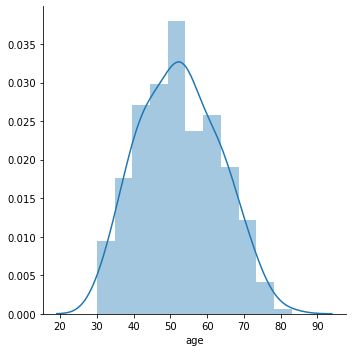

In [ ]:
#plotting to see if the Age attribute is well distributed
sns.FacetGrid(df, height=5).map(sns.distplot,"age")
plt.show()

In [ ]:
#Looking at the number of years and the years the data was collected
years= df['Year of Operation'].unique()
years.sort()
print("The Number of Years the data was collected: ", len(years))
print("The Years during which the study was carried out ", years)

The Number of Years the data was collected:  12
The Years during which the study was carried out  [1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969]


In [ ]:
#Get the number of row itesm for each of the years
y= list(df['Year of Operation'].value_counts())
y

[36, 31, 30, 28, 28, 28, 27, 26, 25, 23, 13, 11]

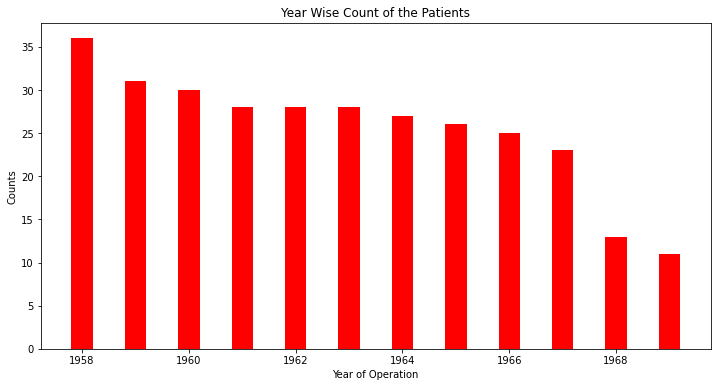

In [ ]:
#Plotting to see the distribution of the samples year wise

#Setting up the backgroud plane
fig= plt.figure(figsize= (12,6))

#Plotting the Histrograms
plt.bar(years,y,color= 'red',width=0.4)
plt.xlabel("Year of Operation")
plt.ylabel("Counts")
plt.title("Year Wise Count of the Patients")
plt.show()

Observation: The patient count has been coming down from the start to the end of the study, the patient count started at 36 and
has gradually come down to 13 by the end of the study. No Specific reason has been mentioned in the description for the fall in 
the patient count.

In [ ]:
#Checking for the number of positive axillary nodes detected values
a= list(df["# Positive axillary nodes detected"].unique())
print(a)
len(a)

[1, 3, 0, 2, 4, 10, 9, 30, 7, 13, 6, 15, 21, 11, 5, 23, 8, 20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28]


31

# Objecttive: To find out the most influenctial attribute on the Survival Staus

# Univariate Analysis

In [ ]:
#Changing the survival status variable from classes 1 and 2 to "Alive" and "Dead"
for i in df["survival status"]:
    if i==1:
        

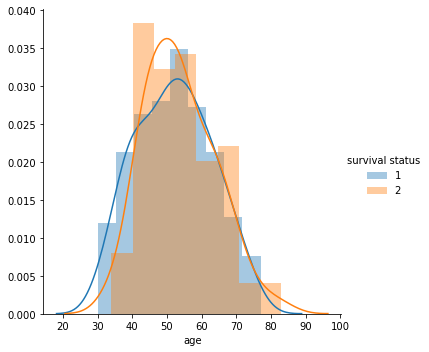

In [ ]:
#Chcking the distribution of the Age attribute on the survival status
sns.FacetGrid(df,hue= "survival status", height=5).map(sns.distplot,'age').add_legend()
plt.show()


Observation:There is almost a complete overlap of the two clasess of Survival Status hence age alone cannot be used to
differentiate between the 2 classes of the Survival Status

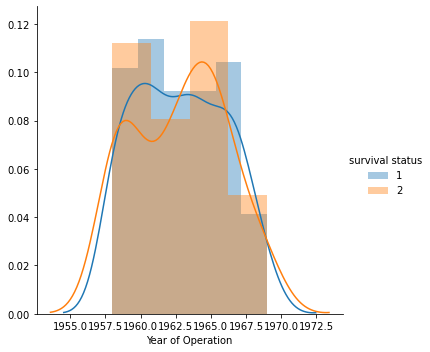

In [ ]:
sns.FacetGrid(df,hue='survival status',height=5).map(sns.distplot,'Year of Operation').add_legend()
plt.show()

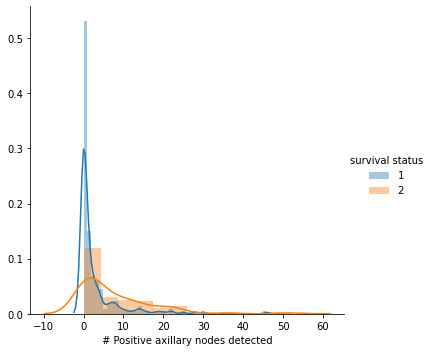

In [ ]:
sns.FacetGrid(df,hue='survival status',height=5).map(sns.distplot,'# Positive axillary nodes detected').add_legend()
plt.show()

Observation: None of the attributes by themselves are able clearly seperate out the classes of Survival Status

Scatter Plots

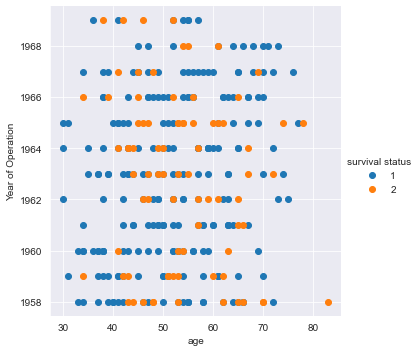

In [ ]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue= 'survival status', height=5).map(plt.scatter,'age','Year of Operation').add_legend()
plt.show()

Observation: It did not really make sense to plot a scatter plot between the Year of Operation attribute and the age attribute

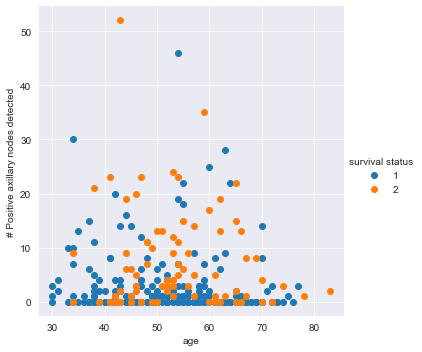

In [ ]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue= 'survival status',height=5).map(plt.scatter,'age','# Positive axillary nodes detected').add_legend()
plt.show()

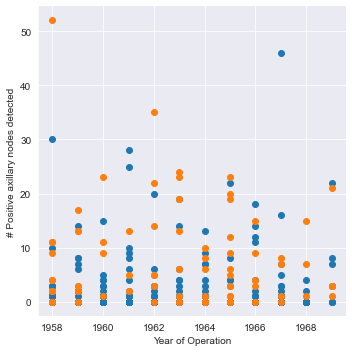

In [ ]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue='survival status',height=5).map(plt.scatter,'Year of Operation','# Positive axillary nodes detected')
plt.show()

Observation: It did not really make sense to plot a scatter plot between the Year of Operation attribute and the age attribute

# MultiVariate Analysis

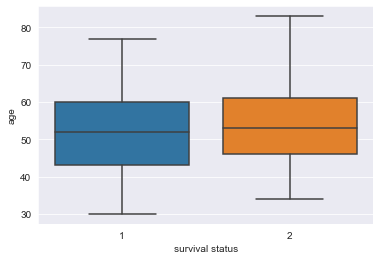

In [ ]:
#Plot BoxPlots to look at the quartile ranges
sns.boxplot(x='survival status', y='age',data= df)
plt.show()

Observation:Seems like the age attribute is equally distributed across the 2 classes of the survival staus with 50th percentile
almost at 52 years of age and there is no clear distiction

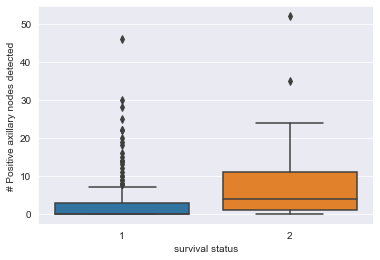

In [ ]:
#Looking at the BoxPlot to look at the quartile ranges
sns.boxplot(x='survival status',y='# Positive axillary nodes detected', data=df)
plt.show()

Observation: Looks like this is a little more useful than the other plots because atleast with 65-70 percent confidence that
any value of Number of Positive axillary nodes detected above 3 can be clearly put into the death category 